In [1]:
!which python

/home/manmeet/anaconda3/envs/py36/bin/python


In [33]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
from datetime import datetime, timedelta
from matplotlib.axes import Axes
import xesmf as xe
from scipy.interpolate import RegularGridInterpolator
from scipy import interpolate

In [34]:
data_dir = 'sfc_ini.nc' 
ds_sfc_ini = xr.open_dataset(data_dir)

data_dir = 'sfcf00.gdas2.1979010100.nc'
ds_sfc_gdas = xr.open_dataset(data_dir)

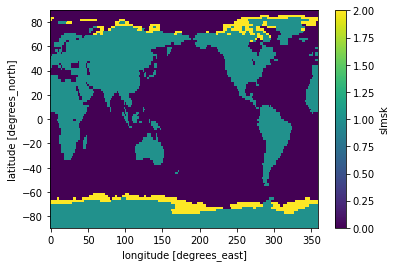

In [35]:
ds_sfc_ini.slmsk.plot()

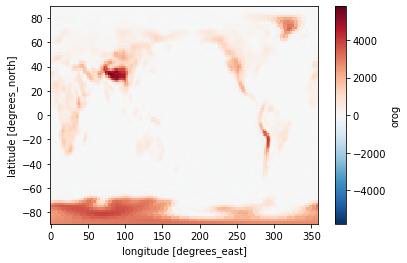

In [36]:
ds_sfc_ini.orog.plot()

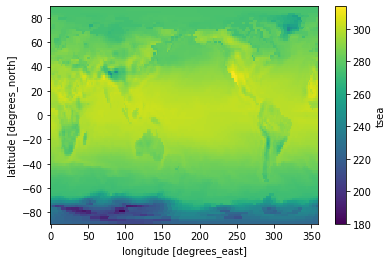

In [37]:
ds_sfc_ini.tsea.plot()

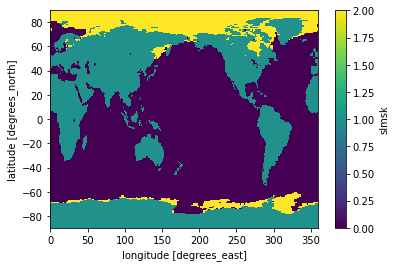

In [38]:
ds_sfc_gdas.slmsk.plot()

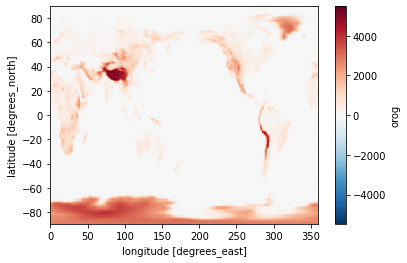

In [39]:
ds_sfc_gdas.orog.plot()

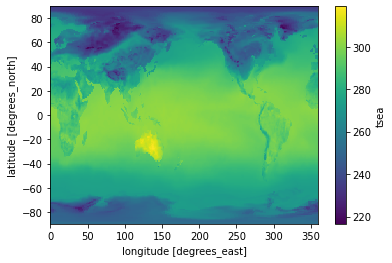

In [40]:
ds_sfc_gdas.tsea.plot()

In [41]:
ds_sfc_ini

<xarray.Dataset>
Dimensions:    (latitude: 94, layer: 4, longitude: 192)
Coordinates:
  * latitude   (latitude) float32 88.54195 86.65317 ... -86.65317 -88.54195
  * longitude  (longitude) float32 0.0 1.875 3.75 ... 354.375 356.25 358.125
  * layer      (layer) int32 1 2 3 4
Data variables:
    slmsk      (latitude, longitude) float32 ...
    orog       (latitude, longitude) float32 ...
    tsea       (latitude, longitude) float32 ...
    sheleg     (latitude, longitude) float32 ...
    tg3        (latitude, longitude) float32 ...
    zorl       (latitude, longitude) float32 ...
    alvsf      (latitude, longitude) float32 ...
    alvwf      (latitude, longitude) float32 ...
    alnsf      (latitude, longitude) float32 ...
    alnwf      (latitude, longitude) float32 ...
    vfrac      (latitude, longitude) float32 ...
    canopy     (latitude, longitude) float32 ...
    f10m       (latitude, longitude) float32 ...
    t2m        (latitude, longitude) float32 ...
    q2m        (latitude, longitude) float32 ...
    vtype      (latitude, longitude) float32 ...
    stype      (latitude, longitude) float32 ...
    facsf      (latitude, longitude) float32 ...
    facwf      (latitude, longitude) float32 ...
    uustar     (latitude, longitude) float32 ...
    ffmm       (latitude, longitude) float32 ...
    ffhh       (latitude, longitude) float32 ...
    hice       (latitude, longitude) float32 ...
    fice       (latitude, longitude) float32 ...
    tisfc      (latitude, longitude) float32 ...
    tprcp      (latitude, longitude) float32 ...
    srflag     (latitude, longitude) float32 ...
    snwdph     (latitude, longitude) float32 ...
    shdmin     (latitude, longitude) float32 ...
    shdmax     (latitude, longitude) float32 ...
    slope      (latitude, longitude) float32 ...
    snoalb     (latitude, longitude) float32 ...
    stc        (layer, latitude, longitude) float32 ...
    smc        (layer, latitude, longitude) float32 ...
    slc        (layer, latitude, longitude) float32 ...
Attributes:
    analysis_date:  2013070100
    forecast_hour:  10968.0

In [42]:
ds_out = xr.Dataset({'lat': (['lat'], ds_sfc_ini.latitude.values),
                     'lon': (['lon'], ds_sfc_ini.longitude.values)
                    })

ds_sfc_gdas = ds_sfc_gdas.rename({
  "latitude": "lat",
  "longitude": "lon"
})

In [43]:
regridder = xe.Regridder(ds_sfc_gdas, ds_out, 'bilinear')

Create weight file: bilinear_190x384_94x192.nc


In [44]:
regridder.clean_weight_file()

Remove file bilinear_190x384_94x192.nc


In [45]:
ds_sfc_gdas_o = regridder(ds_sfc_gdas)

using dimensions ('lat', 'lon') from data variable slmsk as the horizontal dimensions for this dataset.


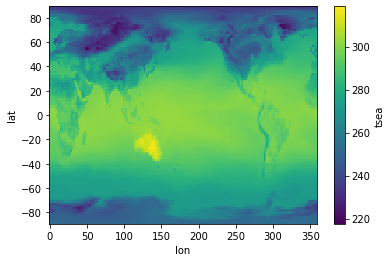

In [47]:
ds_sfc_gdas_o.tsea.plot()

In [48]:
ds_sfc_gdas_o.to_netcdf('sfcf00.gdas2.1979010100_o.nc')